# 붓꽃 종류 판별
- iris setosa / iri versicolor / iris virginica
- petal: 꽃잎의 길이와 넓이
- sepal : 꽃받침의 길이와 넓이

## 패키지 로딩

In [1]:
from sklearn.datasets import load_iris
from sklearn.linear_model import LogisticRegression # 로지스틱 모델
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix, precision_score, f1_score, classification_report, roc_auc_score # 분류 모델 성능 측정용 평가지표

import numpy as np
import pandas as pd

## 데이터 로드 및 확인

In [2]:
iris = load_iris()
x = iris.data
y = iris.target

print(x.shape) # (150, 4)
df = pd.DataFrame(x, columns=iris.feature_names)
df['class'] = y
df.head()
df['class'].value_counts() # 3개의 품종이 각각 50개씩 1:1:1의 비율로 있다

(150, 4)


0    50
1    50
2    50
Name: class, dtype: int64

## 학습 데이터와 평가 데이터 분리

In [3]:
x_train, x_test, y_train, y_test = train_test_split(x, y, train_size=0.8,
                                                    stratify=y)
# stratify=y : 분류마다 1:1:1 비율에 따라 추출해야하므로 분류데이터에서는 무조건 사용해야함
# 랜덤하게 데이터를 가져오다보니 아래의 학습 결과는 다를 수 있음

In [4]:
# 품종에 대한 데이터가 잘 들어갔는 지 확인하기
print('y의 클래스별 데이터 수: ', np.bincount(y))
print('y_train의 클래스별 데이터 수: ', np.bincount(y_train))
print('y_test의 클래스별 데이터 수: ', np.bincount(y_test))

# np.bincount(데이터명) : 데이터별 빈도수를 계산함 : value_counts()와 유사함
# 8:2로 나누었기 때문에 train은 150*8/10=120개 / test는 150*2/10=30개
# 따라서 40개씩 / 10개씩 골고루 들어간 것

y의 클래스별 데이터 수:  [50 50 50]
y_train의 클래스별 데이터 수:  [40 40 40]
y_test의 클래스별 데이터 수:  [10 10 10]


## 모델 생성
- 다항분류를 위한 옵션
    - multi_class : 다중클래스분류 문제의 상황에서 어떤 접근방식을 취할 지 결정
        - 'ovr' (one-versus-rest): 이진분류기인 sigmoid 함수를 이용한 결과 예측 (solver='liblinear'는 one-versus-rest 방식으로 제한되므로 사용 불가)
        - 'multinominal' : 각 클래스에 대한 softmax(확률분포를 구하는 함수)의 확률값으로 다중분류 수행
- 참고 : 이전에 이진분류를 위한 solver별 옵션을 학습했었음

In [5]:
# 다진분류 문제를 이진분류 문제로 치환하여 해결
model = LogisticRegression(multi_class='ovr', max_iter=2000)
model.fit(x_train, y_train)
# solver를 따로 명시하지 않았으므로 DEFAULT인 liblinear가 자동 적용된다

LogisticRegression(max_iter=2000, multi_class='ovr')

## 모델 예측

In [6]:
np.set_printoptions(suppress=True, precision=3)

In [7]:
y_hat = model.predict(x_test)
prob = model.predict_proba(x_test) # 각 클래스에 대한 확률값
print(prob)


# [0.001 0.361 0.638]
# 첫 번째 품종에 대한 회귀선을 그엇을 때, 첫 번째 품종일 확률 = 0.001
# 두 번째 품종에 대한 회귀선을 그엇을 때, 두 번째 품종일 확률 = 0.361
# 세 번째 품종에 대한 회귀선을 그엇을 때, 세 번째 품종일 확률 = 0.638
# -> 3번째 품종

[[0.002 0.599 0.399]
 [0.97  0.03  0.   ]
 [0.001 0.165 0.835]
 [0.838 0.162 0.   ]
 [0.074 0.918 0.008]
 [0.001 0.605 0.394]
 [0.    0.18  0.82 ]
 [0.    0.318 0.682]
 [0.007 0.679 0.314]
 [0.897 0.103 0.   ]
 [0.171 0.825 0.004]
 [0.031 0.907 0.062]
 [0.771 0.229 0.   ]
 [0.001 0.13  0.87 ]
 [0.023 0.919 0.058]
 [0.794 0.206 0.   ]
 [0.595 0.405 0.   ]
 [0.019 0.681 0.3  ]
 [0.056 0.835 0.109]
 [0.962 0.038 0.   ]
 [0.001 0.267 0.732]
 [0.94  0.06  0.   ]
 [0.001 0.446 0.554]
 [0.003 0.766 0.23 ]
 [0.    0.285 0.714]
 [0.    0.176 0.824]
 [0.005 0.331 0.664]
 [0.889 0.111 0.   ]
 [0.859 0.141 0.   ]
 [0.003 0.431 0.566]]


In [8]:
df = pd.DataFrame(prob[:5], columns=['class-0', 'class-1', 'class-2'])
df['result'] = np.argmax(prob[:5], axis=1)
# 행 기준으로 가장 큰 값의 index(0,1,2) 데이터가 담긴 새로운 열 result 생성
df

,class-0,class-1,class-2,result
0,0.001566,0.599201,0.399232,1
1,0.970294,0.029705,0.000001,0
2,0.000524,0.164607,0.834869,2
3,0.837761,0.162237,0.000001,0
4,0.074070,0.918260,0.007670,1


## 모델 평가

In [9]:
print(f'Accuracy: {accuracy_score(y_test, y_hat):.3f}')
print(f'AUC: {roc_auc_score(y_test, prob, multi_class="ovr"):.3f}')
# prob, multi_class='ovr' : 이진분류에서는 positive인 1번째 열값을 슬라이싱 했었는데, 다진분류에서는 어떤 것이 postivie인 지 모르기 때문

cf = confusion_matrix(y_test, y_hat)
print(cf)
# AUC: 0.982 : Good
# [10  0  0] : 첫 번째 품종 10개 다 맞춘 것
# [ 0  9  1] : 두 번째 품종 9개 맞추고 1개 틀린 것
# [ 0  0 10] : 세 번째 품종 10개 다 맞춘 것

Accuracy: 0.867
AUC: 0.972
[[10  0  0]
 [ 0  8  2]
 [ 0  2  8]]


In [14]:
# 다중 클래스 분류시, average 속성에 집계 방식을 지정 (micro, macro, weight)
precision = precision_score(y_test, y_hat, average='micro')
print(f'Precision: {precision:.3f}')
# micro에서는 결국에 각 클래스 별 평가지표의 평균이므로 모든 metric 값 (Accuracy=Precision=Recall=Micro F1) 이 동일하게 나타난다.


# 한 번에 조회하기
report = classification_report(y_test, y_hat)
print(report)

Precision: 0.867
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        10
           1       0.80      0.80      0.80        10
           2       0.80      0.80      0.80        10

    accuracy                           0.87        30
   macro avg       0.87      0.87      0.87        30
weighted avg       0.87      0.87      0.87        30



## 다중 클래스 혼동행렬 시각화

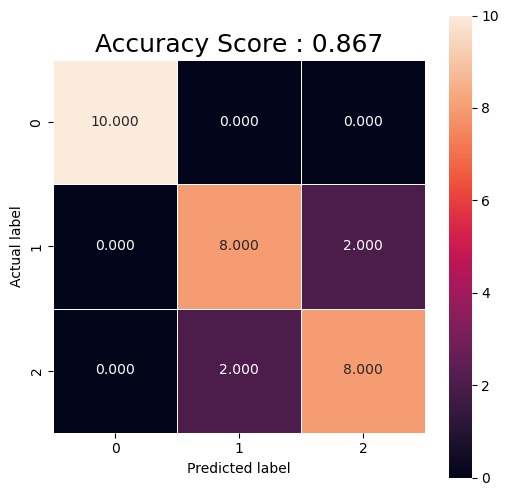

In [17]:
# 혼동행렬 시각화 하기: seaborn의 heatmap

import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(6,6))
sns.heatmap(cf, annot=True, fmt='.3f', linewidths=0.5, square=True)
# heatmap : 교차표를 시각화하는 seaborn 함수
# cf = confusion_matrix(y_test, y_hat)
# annot = annotation
# fmt = 교차표 내에 들어가는 데이터에 대한 포맷팅 지정 (실수, 정수)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')
# sklearn의 confusion_matrix 사용시 -> 행 : 실제 / 열 : 예측
plt.title(f'Accuracy Score : {accuracy_score(y_test, y_hat):.3f}', size=18)
plt.show()


## 하이퍼 파라미터 튜닝
- hyper-parameter-tunning
- 머신러닝에서는 전달하는 다양한 파라미터 (multi_class, solver, max_iter 등)에 따라 모델의 성능이 달라진다. 따라서 매번 파라미터 값을 바꿔가며 모델의 성능을 개선시키게 될 텐데, 여러 파라메터 조합의 경우의 수가 너무 많을 경우 시간 소요가 크다.
- 자동으로 최적의 조합을 찾아내는 것을 제공하는 함수 : GridSearchCV

In [22]:
from sklearn.model_selection import GridSearchCV
# 교차검증까지 수행
# 전달하고자 하는 parameter들을 key와 value의 쌍으로 매핑

model = LogisticRegression()
params = {'C': [0.01, 0,1, 1, 3, 5, 10],
         'penalty': ['l1', 'l2'],
         'solver': ['newton-cg', 'lbfgs', 'sag', 'saga', 'liblinear'],
         'multi_class' : ['ovr', 'multinominal']}
# c : 규제 강도의 역수 (낮을수록 셈)를 지정하는 key 값 // cf) alpha는 규제 강도
# penalty : 규제의 종류를 지정하는 key 값
# solver : 분류 알고리즘의 종류

gs = GridSearchCV(model, params, cv=5, scoring='accuracy', n_jobs=-1)
# cv : 교차검증 횟수 (DEFAULT는 5회)
# scoring : 평가지표의 이름을 리스트로 전달
# n_jobs : 하이퍼 파라미터 튜닝시 사용하는 코어의 개수 (DEFAULT : 1) 
# n_jobs = -1 : 모든 코어 사용
# 예전처럼 싱글코어가 아닌 여러 개의 threshold를 동시 실행 가능하므로 개수 지정
gs.fit(x_train, y_train)
print('최적 파라미터: ', gs.best_params_)
# gs.best_params_ : 최적의 파라미터 조합 결과 반환
print('최적 정확도: ', gs.best_score_)
# gs.best_score_ : 최적의 평가지표 결과 반환


# 각 solver 별로 지원되는 규제의 종류가 다른데, 모든 조합을 실행해보라고 했기 때문에 아래의 경고 메세지가 뜨는 것

최적 파라미터:  {'C': 10, 'multi_class': 'ovr', 'penalty': 'l1', 'solver': 'liblinear'}
최적 정확도:  0.9833333333333332


C:\Users\user\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:372: FitFailedWarning: 
490 fits failed out of a total of 700.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
70 fits failed with the following error:
Traceback (most recent call last):
  File "C:\Users\user\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 680, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\user\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py", line 1461, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
  File "C:\Users\user\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py", line 447, in _check_solver
    raise ValueError(
ValueE

## 최적 파라미터를 이용한 모델 평가

In [28]:
y_hat = gs.best_estimator_.predict(x_test)
# best_estimator_ : 최적의 결과를 보여주는 파라미터 조합으로 만들어진 분류모형
print(f'Accuracy: {accuracy_score(y_test, y_hat):.3f}')
# y_hat : gridsearch를 통해 만들어낸 최적 파라미터 조합의 분류 모형
print(f'AUC: {roc_auc_score(y_test, gs.best_estimator_.predict_proba(x_test), multi_class="ovr"):.3f}')
# gs.best_estimator_.predict_proba(x_test) : positive로 예측한 확률값

Accuracy: 0.967
AUC: 0.980
